In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## All the required modules are imported for further processing.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## The train and test data is imported required for survival .

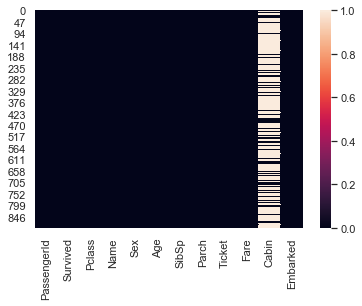

In [3]:
sns.heatmap(train.isnull())

## A simple heatmap is generated to see which of our feature is inconsistent and to make our data clean.

In [4]:
train = train.drop(['Ticket','Cabin','Embarked'],axis =1)
test = test.drop(['Ticket','Cabin','Embarked'],axis =1)

## Dropped the non-required features but if you want you can use this features and process further.

In [5]:
train['Sex'] = train['Sex'].map({'male':1,'female':0})
test['Sex'] = test['Sex'].map({'male':1,'female':0})

## Mapping the categorical values into numerical as error will occur while scaling.

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000


In [7]:
targets = train.iloc[:,1]
targets

## The target data is been stored in target variable for calculation of survived peoples.

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
train = train.drop('Survived',axis =1 )


In [9]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,23.4500
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000


In [10]:
test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'], dtype=object)

In [11]:
column_name = [ 'Pclass', 'PassengerId','Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare']

In [12]:
train = train[column_name]
test = test[column_name]

## The columns of test and train are arranged so it becomes easy for processing of data.

In [13]:
train

,Pclass,PassengerId,Name,Sex,Age,SibSp,Parch,Fare
0,3,1,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500
1,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250
3,1,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000
4,3,5,"Allen, Mr. William Henry",1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,2,887,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000
887,1,888,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000
888,3,889,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,23.4500
889,1,890,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000


In [14]:
f = train.iloc[:,1:3]
g = test.iloc[:,1:3]

## PassengerId and Name are stored in different variable as they don't contribute in calculating surviving of people also can 
##  damage accuracy of model but are useful to identify which person survived.

In [15]:
train = train.drop(['PassengerId','Name'] , axis =1)

In [16]:
test = test.drop(['PassengerId','Name'] , axis =1)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

## Instance of scaler is created.

In [19]:
scaler.fit(train)

## The inputs are scaled for further processing.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train , x_test , y_train , y_test = train_test_split(train , targets , random_state = 100 , train_size = 0.8)

## Data is split into variables to built our model into test and train data.

In [22]:
x_train.shape,y_train.shape

((712, 6), (712,))

In [23]:
x_test.shape , y_test.shape

((179, 6), (179,))

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression()

## Logistic Regression model is imported and an instance of that is created.

In [26]:
logmodel.fit(x_train,y_train)

## The model is fit to be used now.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
logmodel.score(x_train,y_train)

## This is the accuracy of our model which will calculate survived people.

0.8033707865168539

In [28]:
logmodel.score(x_test,y_test)

0.8100558659217877

In [29]:
sum(logmodel.predict(x_test) == y_test) / logmodel.predict(x_test).shape[0] * 100

## This is the process of calculating accuracy manually.

81.00558659217877

In [30]:
pd.options.display.max_rows = None

In [31]:
predictions = logmodel.predict(test)

## The test data is used for predicting survived people using .predict()

In [32]:
from sklearn.metrics import confusion_matrix , classification_report

In [33]:
print(classification_report(g['PassengerId'],predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
         892       0.00      0.00      0.00       1.0
         893       0.00      0.00      0.00       1.0
         894       0.00      0.00      0.00       1.0
         895       0.00      0.00      0.00       1.0
         896       0.00      0.00      0.00       1.0
         897       0.00      0.00      0.00       1.0
         898       0.00      0.00      0.00       1.0
         899       0.00      0.00      0.00       1.0
         900       0.00      0.00      0.00       1.0
         901       0.00      0.00      0.00       1.0
         902       0.00      0.00      0.00       1.0
         903       0.00      0.00      0.00       1.0
         904       0.00      0.00      0.00       1.0
         905       0.00      0.00      0.00       1.0
         906       0.00      0.00      0.00       1.0
         907       0.00    

C:\Users\DADYA.LAPTOP-1HLCDBKO\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DADYA.LAPTOP-1HLCDBKO\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
confusion_matrix(g['PassengerId'],predictions)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [36]:
predictionsData = pd.DataFrame(data = {'Name' : g['Name'],'Survived':predictions})

## The required prediction is generated.

In [37]:
predictionsData

,Name,Survived
0,"Kelly, Mr. James",0
1,"Wilkes, Mrs. James (Ellen Needs)",0
2,"Myles, Mr. Thomas Francis",0
3,"Wirz, Mr. Albert",0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
5,"Svensson, Mr. Johan Cervin",0
6,"Connolly, Miss. Kate",1
7,"Caldwell, Mr. Albert Francis",0
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1
9,"Davies, Mr. John Samuel",0


In [38]:
predictionsData_Pid = pd.DataFrame(data = {'PassengerId': g['PassengerId'],'Survived': predictions})


In [39]:
predictionsData_Pid

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [40]:
predictionsData_Pid.to_csv('Titanic_survival1.csv', header=True , index=False )

## The required output is stored in csv file.